In [1]:
from astropy.io import fits
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.utils.data import get_pkg_data_filename
from astropy.convolution import convolve, Gaussian1DKernel

# coadd-sv3-dark-10016.fits

Index of /public/edr/spectro/redux/fuji/healpix/sv3/dark/100/10016/

In [2]:
espc = fits.open('coadd-sv3-dark-10016.fits') #open file
#espc.info() #resume el contenido de la tabla

In [3]:
Targetid_coadd = Table.read(espc, hdu=1) #De esta tabla podemos extraer los TARGET ID y validar el sepctype en otro catalogo
#print (Targetid_coadd)

In [8]:
#En la posición -5 se encuentra una estrella por ende vamos a imprimir las listas de flujos en B,R,Z
print(espc[4].data[-5]) #lista con los flujos en B. Se imprime la lista correspondiente al espectro de la estrella en la posicion -5
print(espc[9].data[-5]) # lista con los flujos en R
print(espc[14].data[-5]) # lista con los flujos en Z
# Verificar si las listas están llenas de ceros
esta_llena_de_ceros1 = all(elemento == 0 for elemento in espc[4].data[-5])
esta_llena_de_ceros2 = all(elemento == 0 for elemento in espc[9].data[-5])
esta_llena_de_ceros3 = all(elemento == 0 for elemento in espc[14].data[-5])
# Imprimir los resultados
print("Lista 1 está llena de ceros:", esta_llena_de_ceros1)
print("Lista 2 está llena de ceros:", esta_llena_de_ceros2)
print("Lista 3 está llena de ceros:", esta_llena_de_ceros3)
#Como se observa el resultado es True por tanto las listas estan llenas de ceros pero la grafica no indica lo mismo
# la grafica corresponde a la estrella STAR-3585505 la puede encontrar en la carpeta redux-fuji-healpix-sv3-Dark/ 100-10016 / Graficos espectrales

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
Lista 1 está llena de ceros: True
Lista 2 está llena de ceros: True
Lista 3 está llena de ceros: True


# redrock-sv3-dark-10016.fits
Index of /public/edr/spectro/redux/fuji/healpix/sv3/dark/100/10016/

In [7]:
redrock = fits.open('redrock-sv3-dark-10016.fits') #open file
redrock.info()

Filename: redrock-sv3-dark-10016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   ()      
  1  REDSHIFTS     1 BinTableHDU     32   41R x 11C   [K, D, D, K, D, 10D, K, 6A, 20A, K, D]   
  2  FIBERMAP      1 BinTableHDU    149   41R x 70C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E]   
  3  EXP_FIBERMAP    1 BinTableHDU     61   61R x 26C   [K, J, D, J, J, D, J, D, I, J, K, J, J, E, E, E, D, D, K, D, D, D, D, D, D, D]   
  4  TSNR2         1 BinTableHDU     75   41R x 33C   [K, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [8]:
Targetid_redrock= Table.read(redrock, hdu=1)
n_esp=len(Targetid_coadd)
n=0
check=False
while n< n_esp: # revisa que los Targetid de Coadd sean iguales a los de redrock (mismos objetos) 
    if Targetid_redrock['TARGETID'][n]==Targetid_coadd['TARGETID'][n]:
        n+=1
        check=True
    else: 
        check=False
        break
print (check)

True


In [13]:
xb=espc[4].data[-5]
print(xb)

[0. 0. 0. ... 0. 0. 0.]


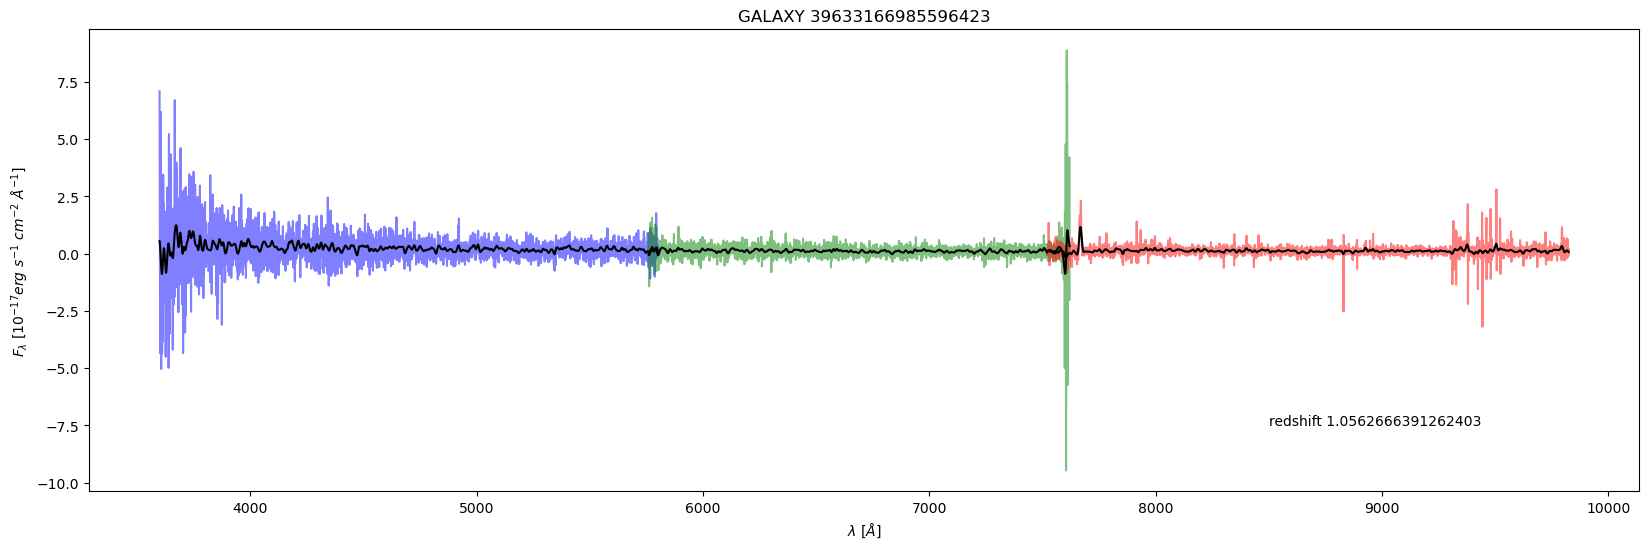

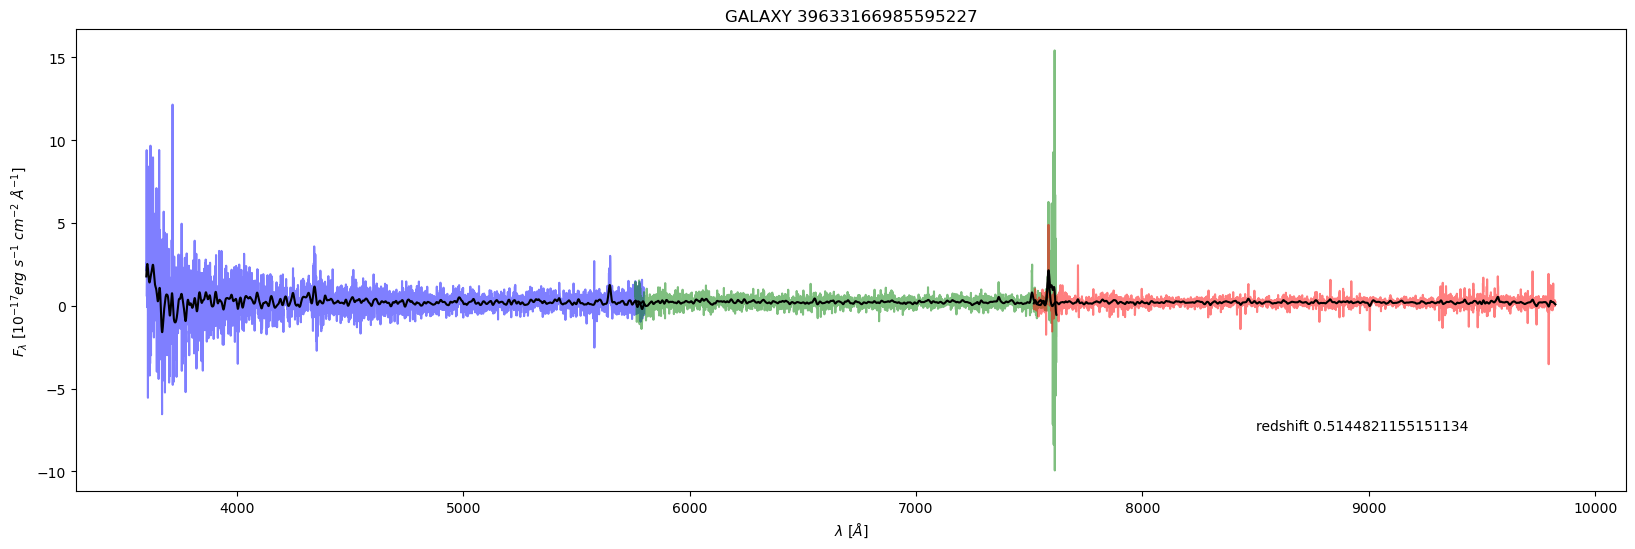

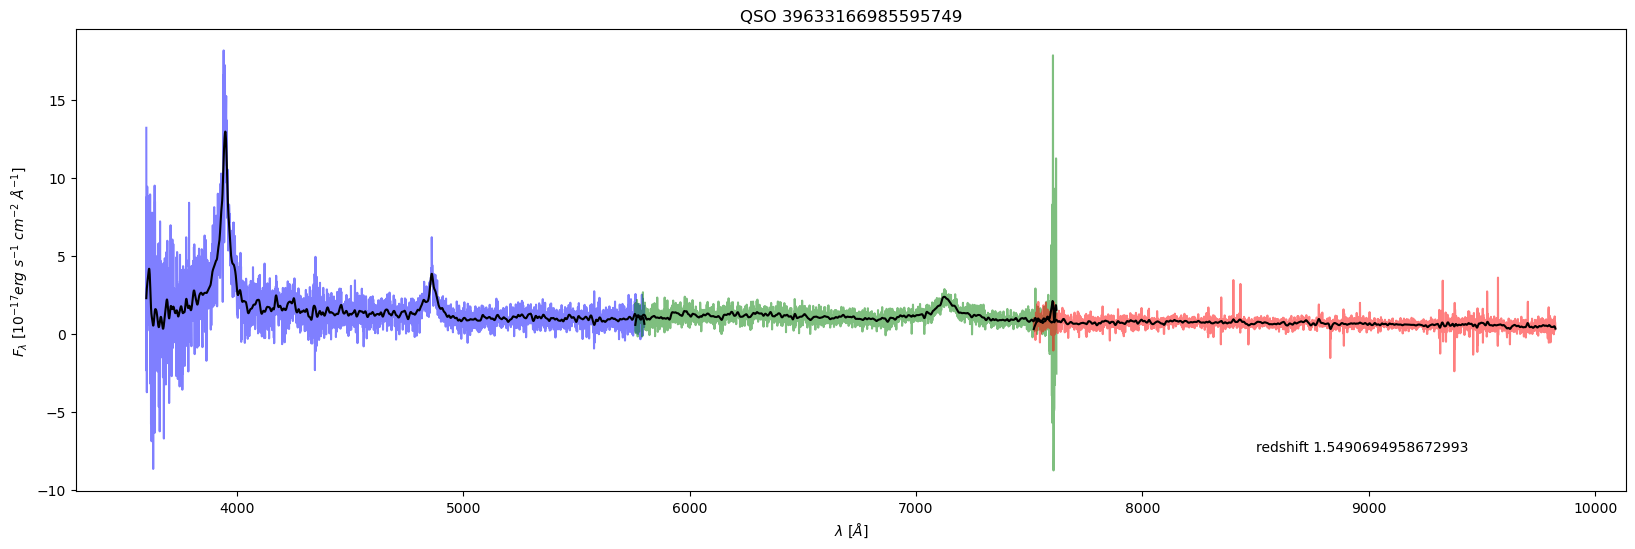

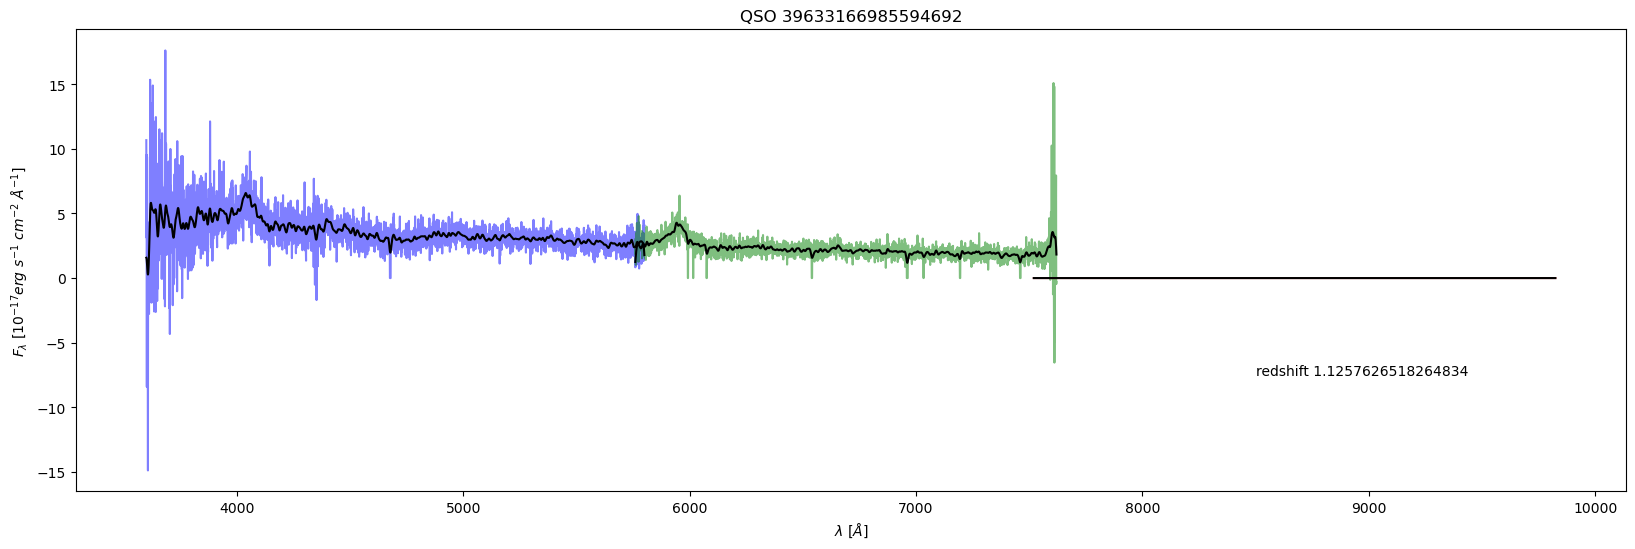

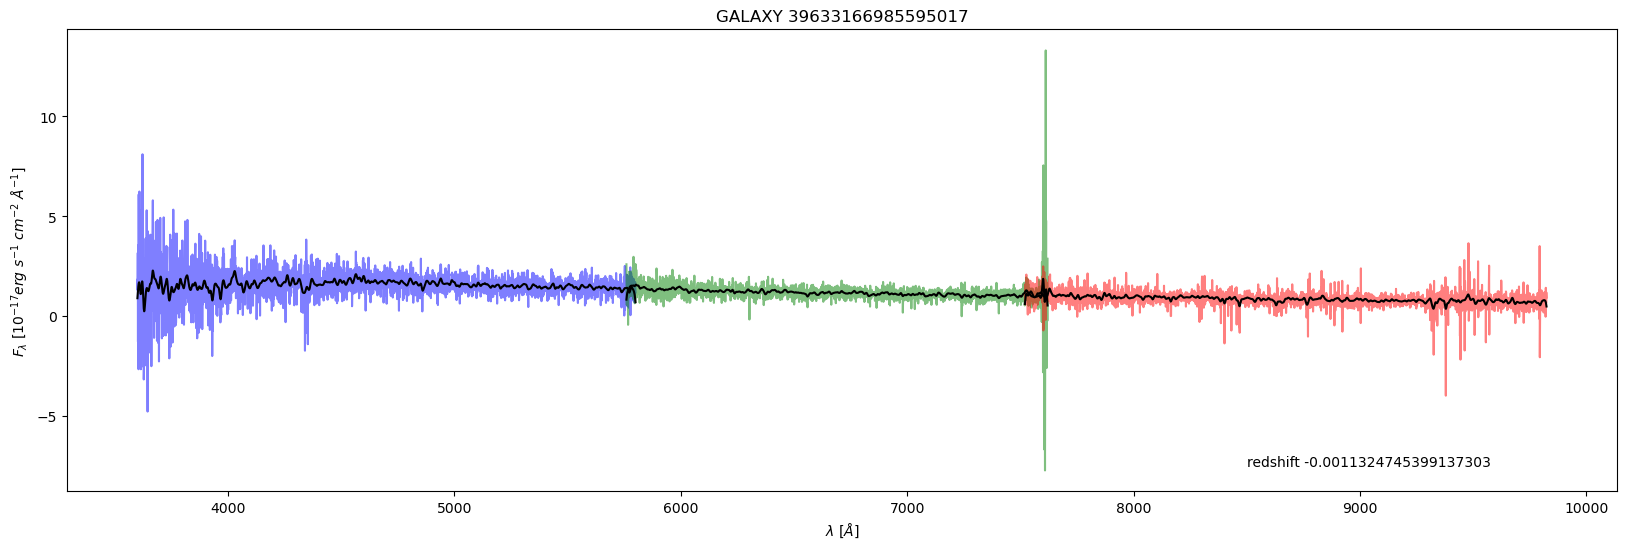

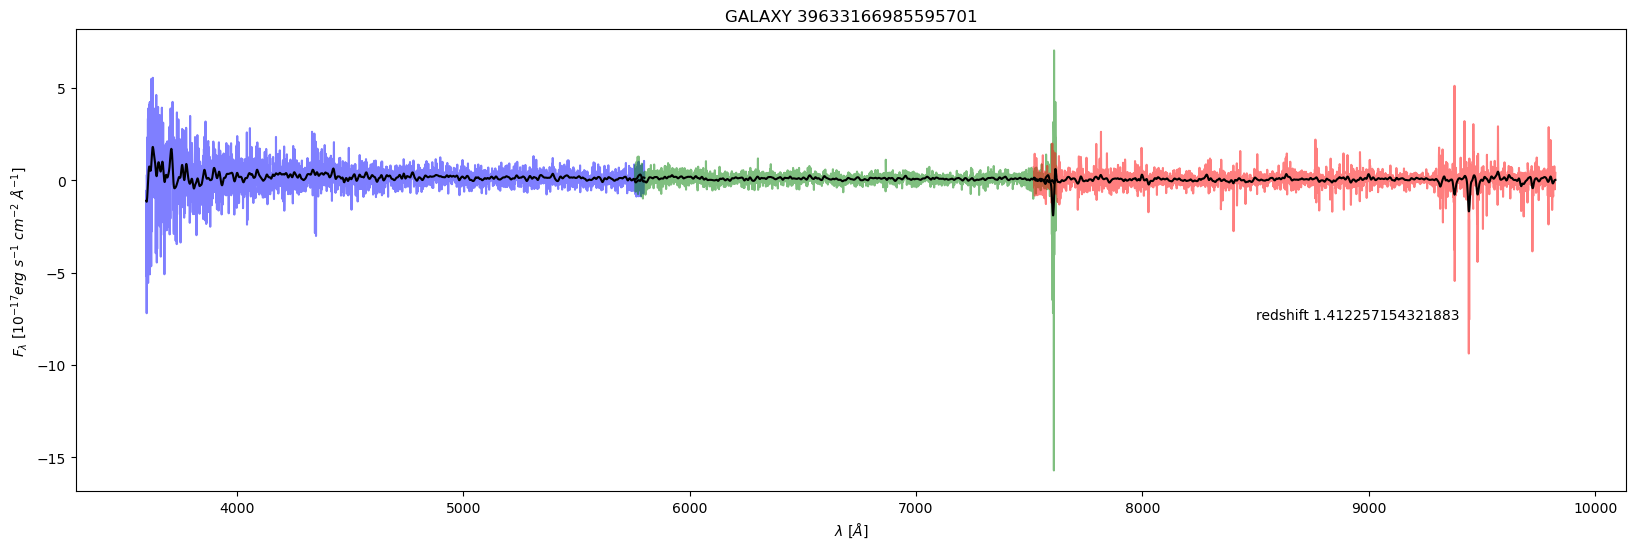

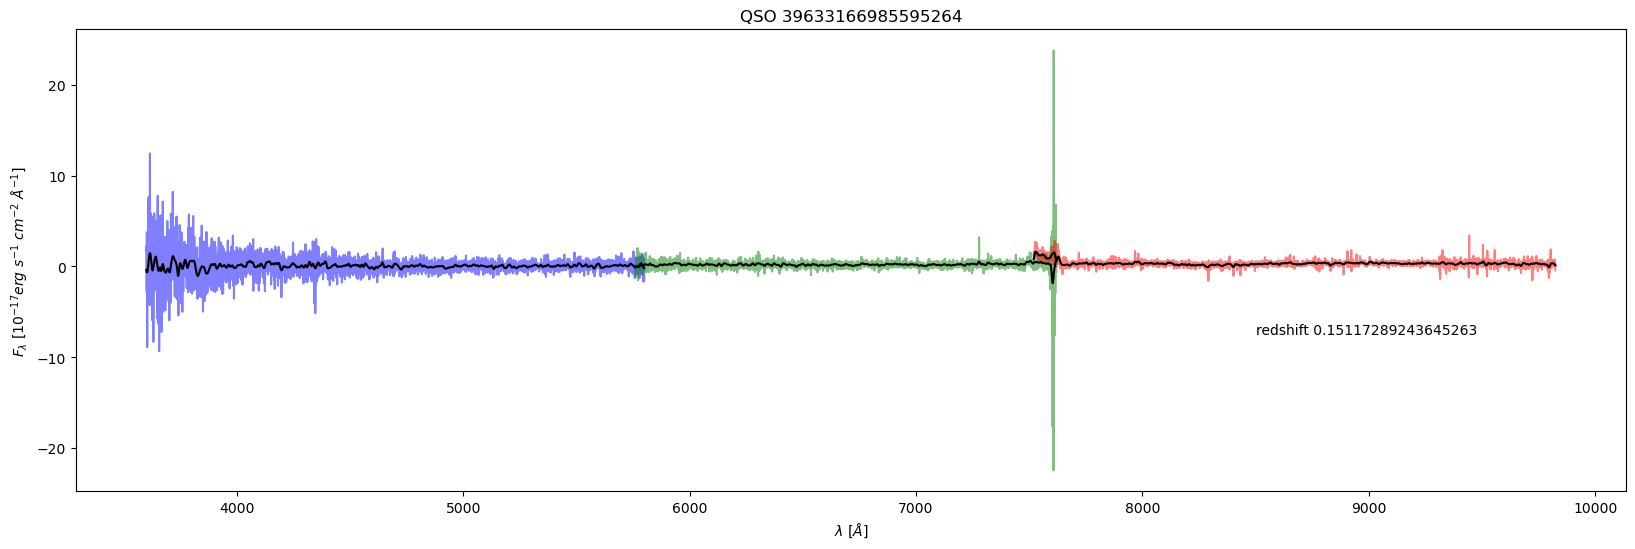

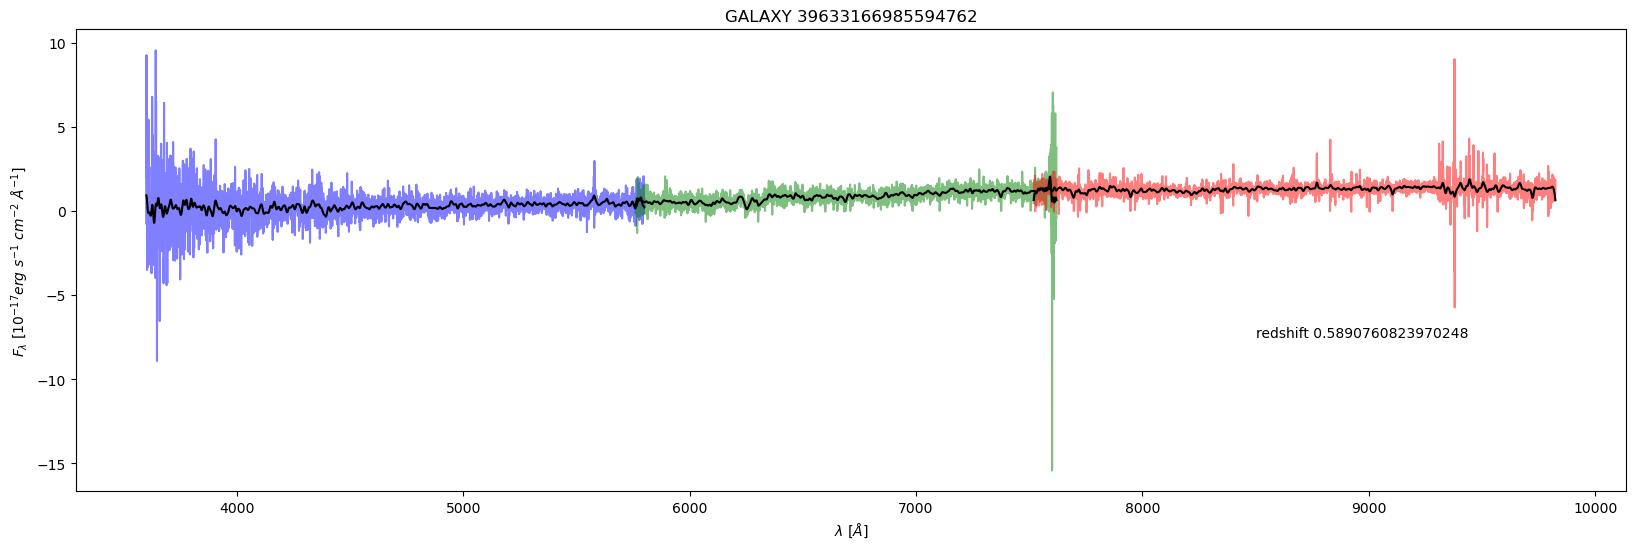

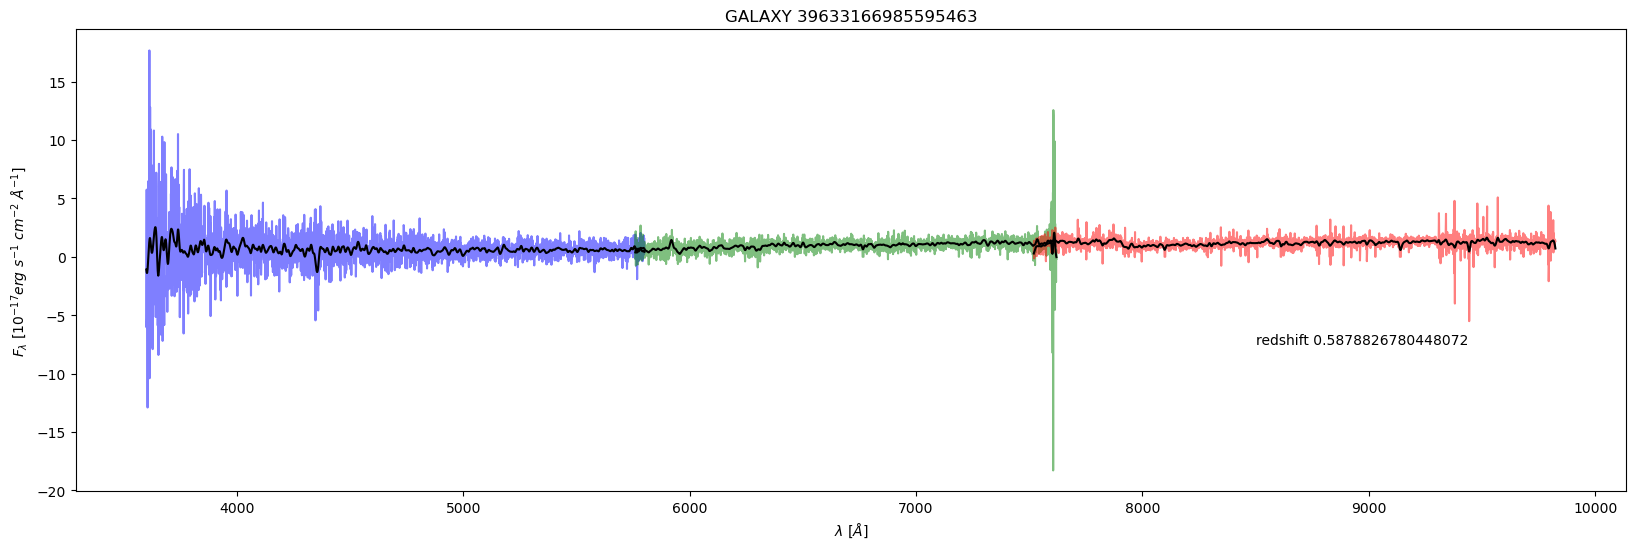

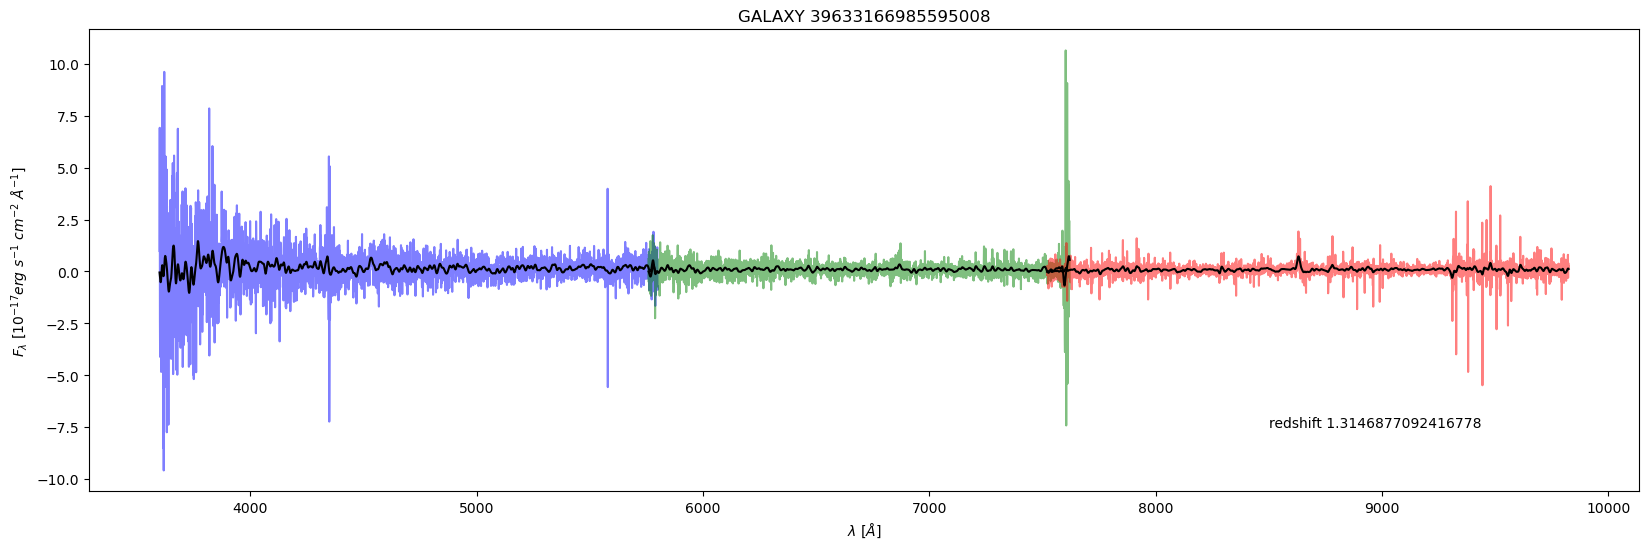

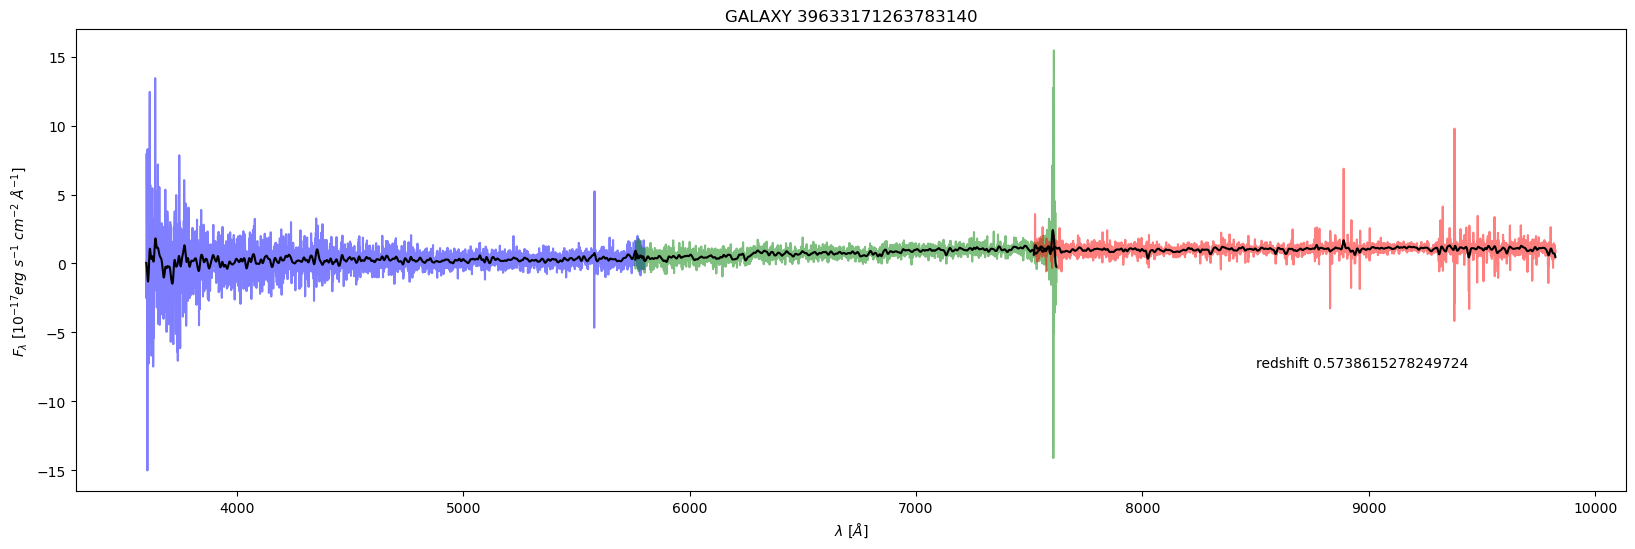

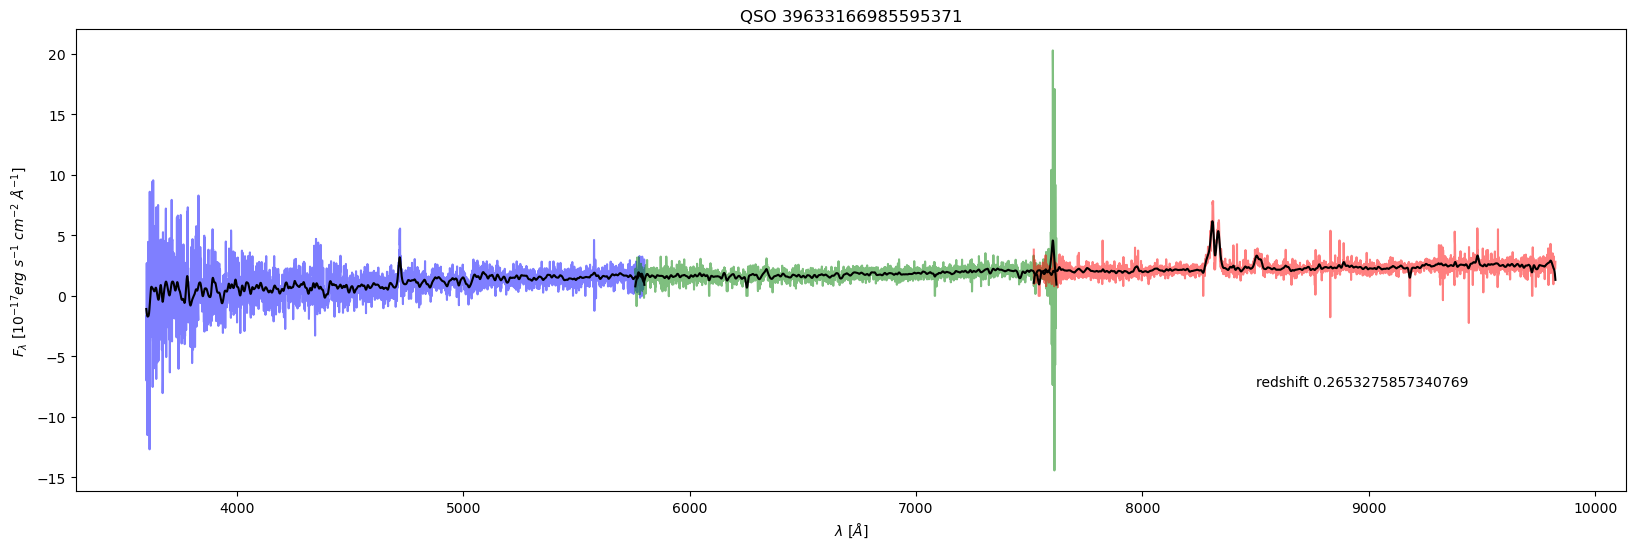

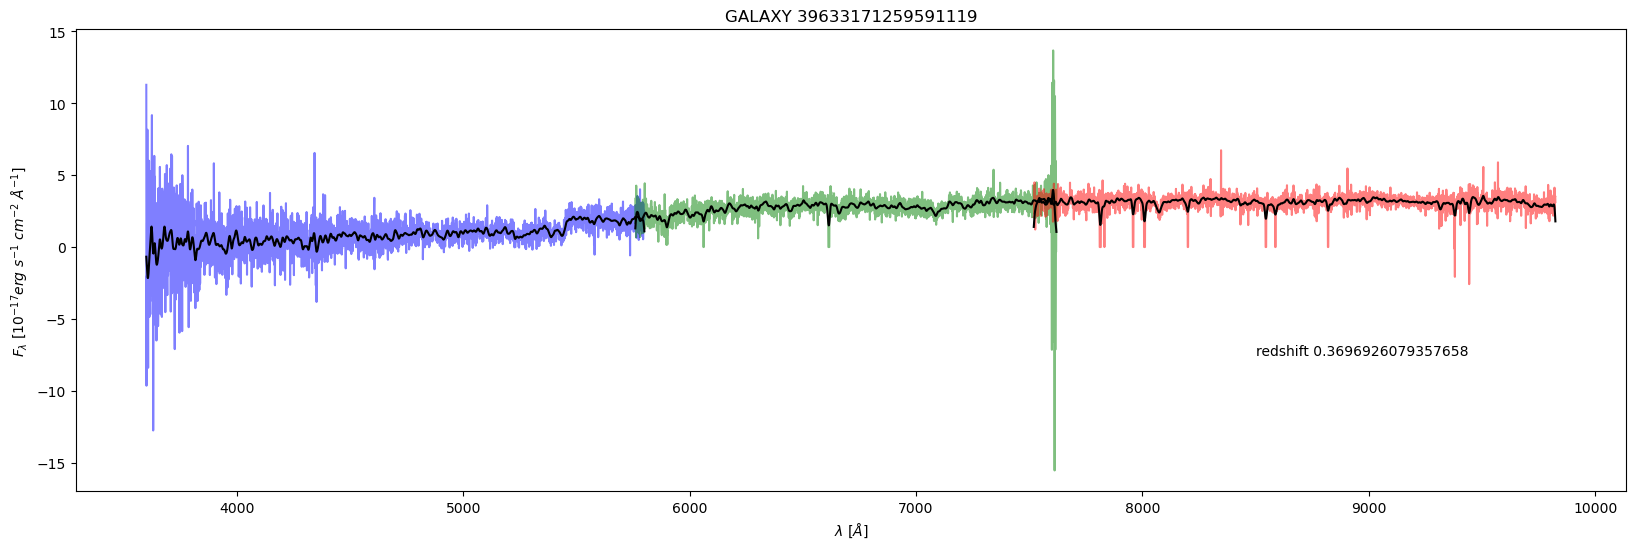

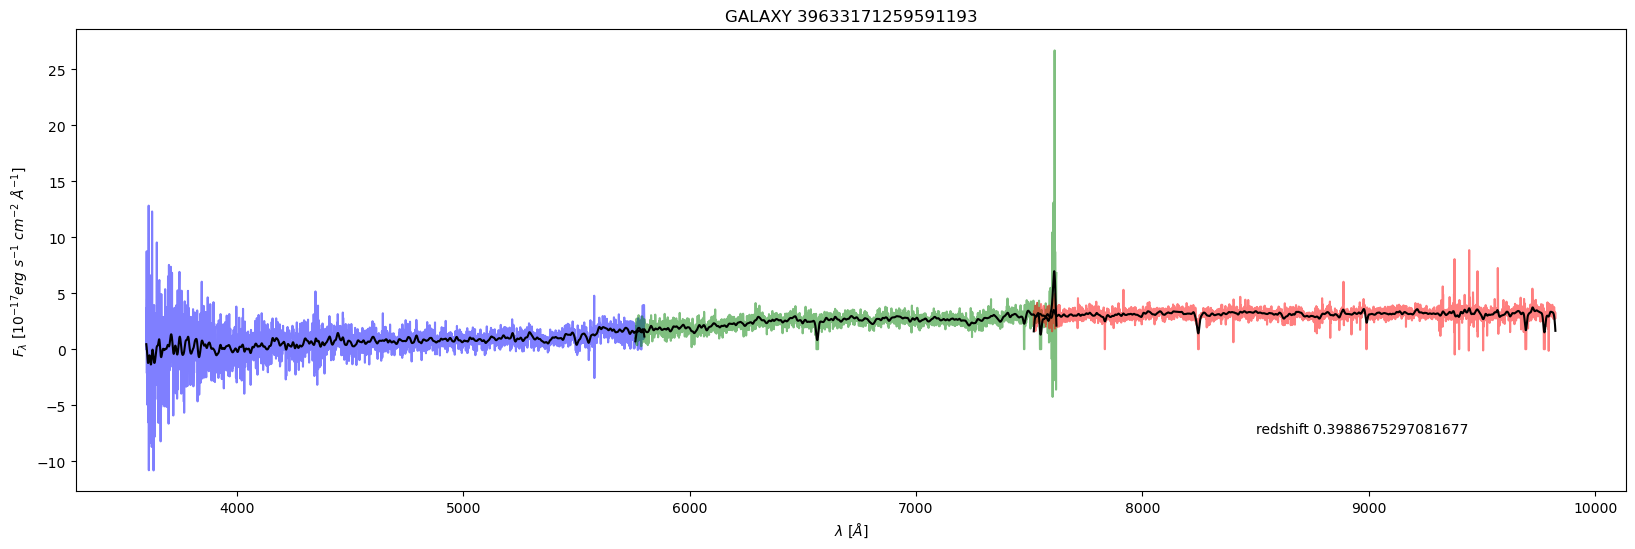

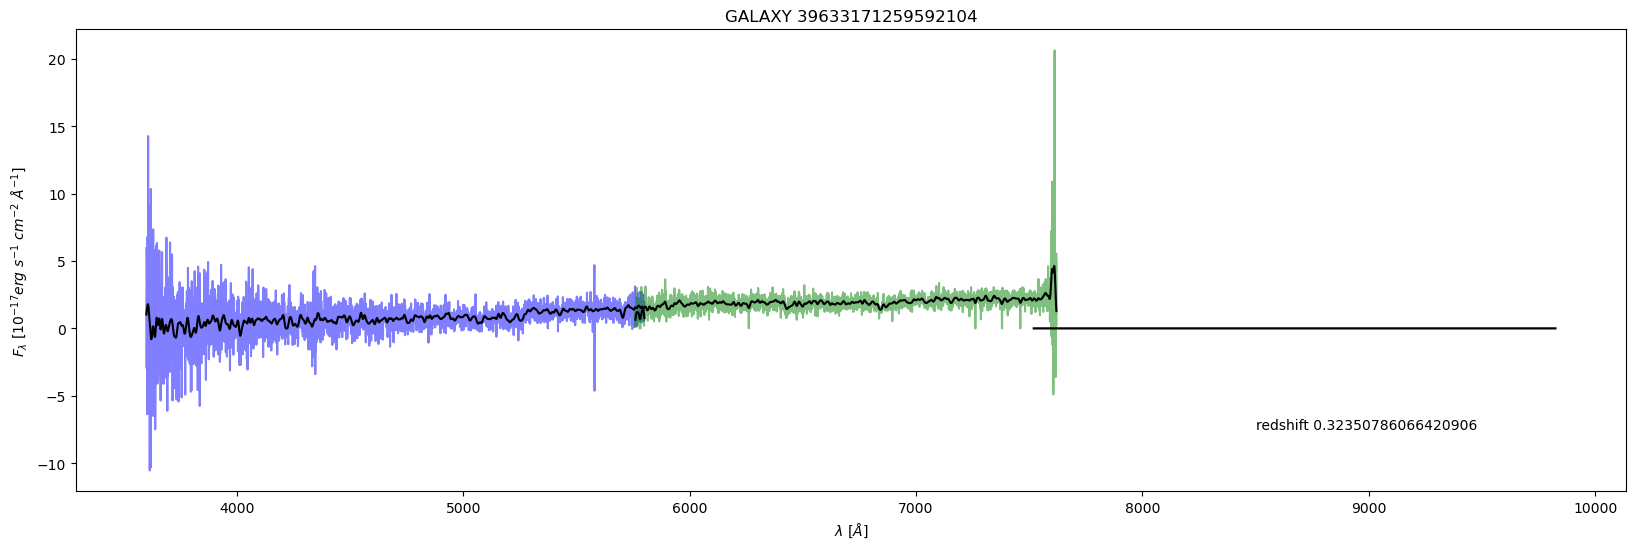

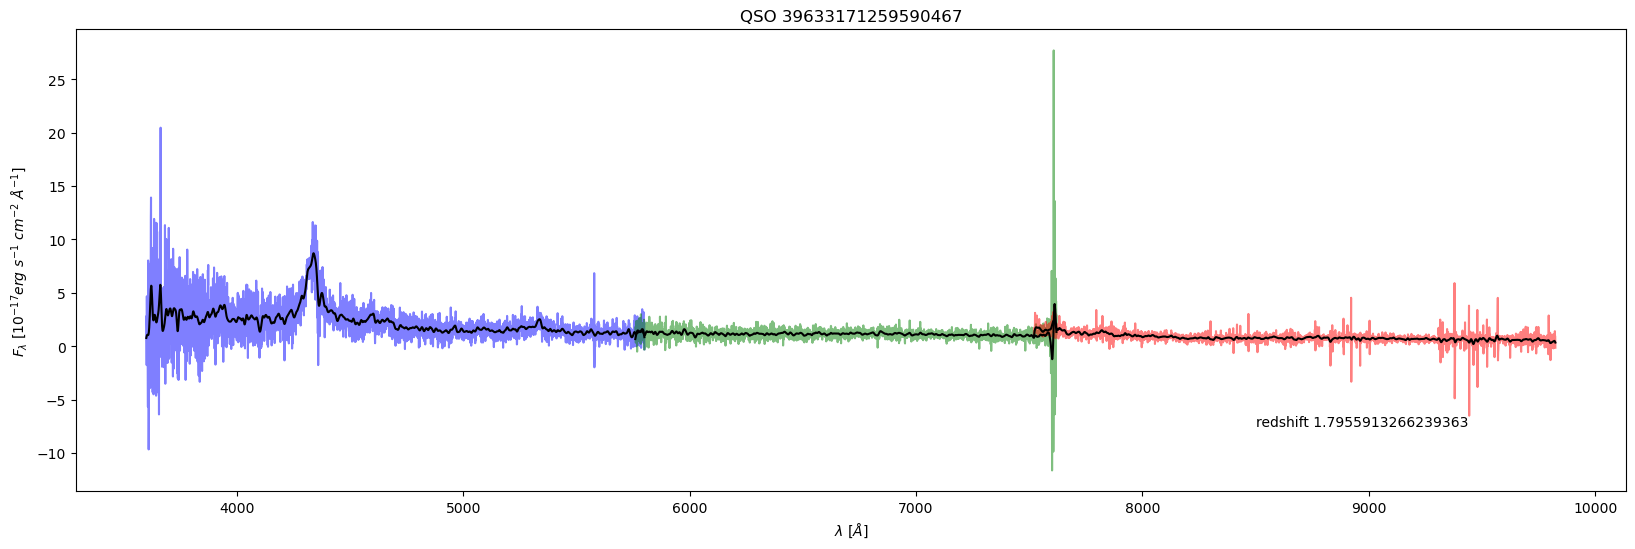

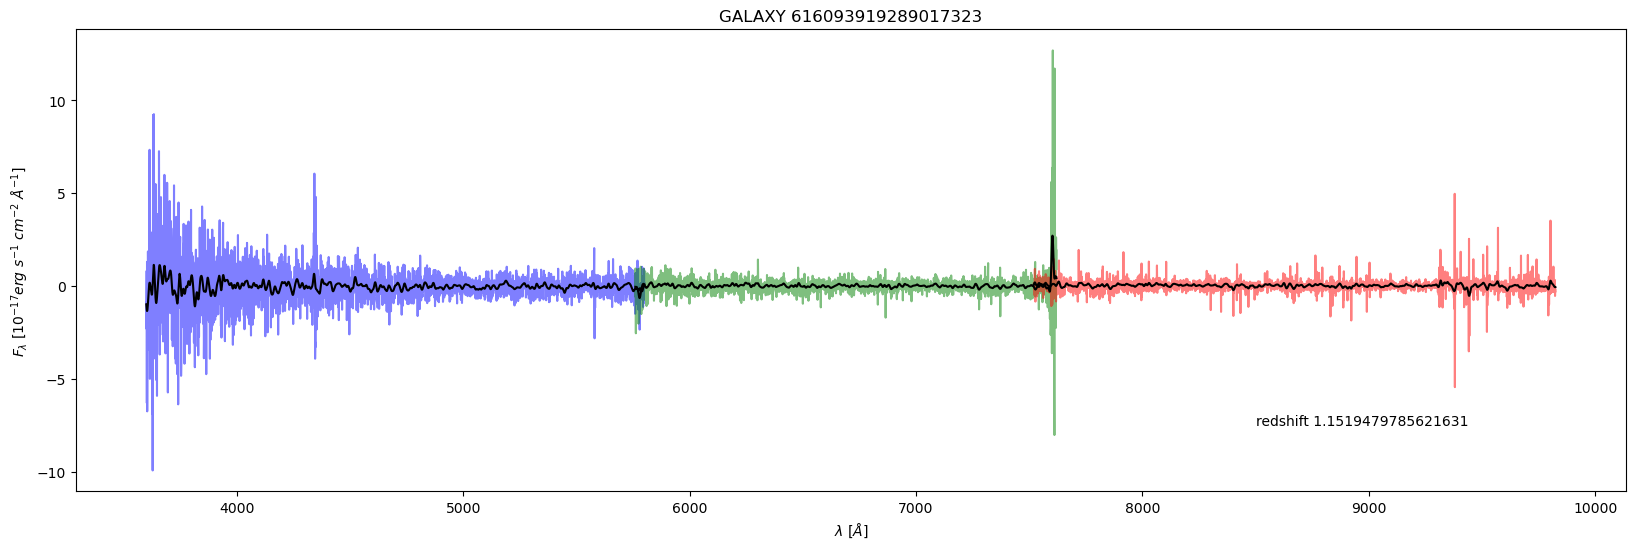

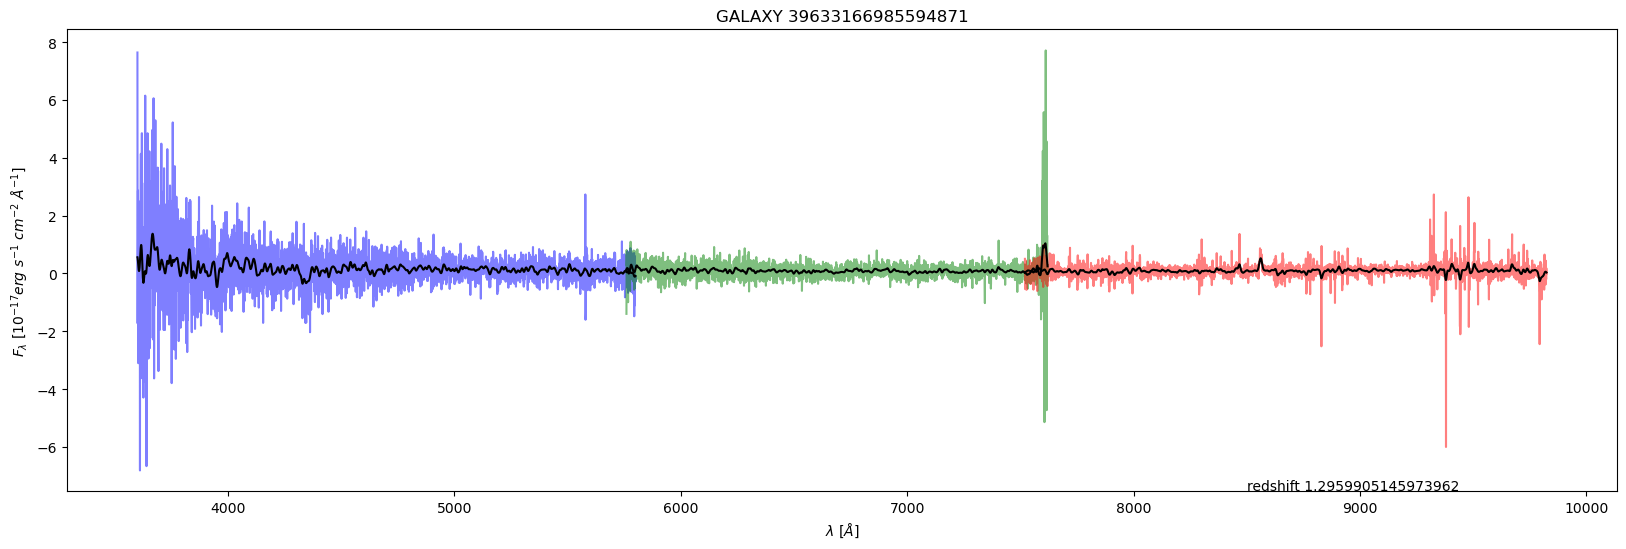

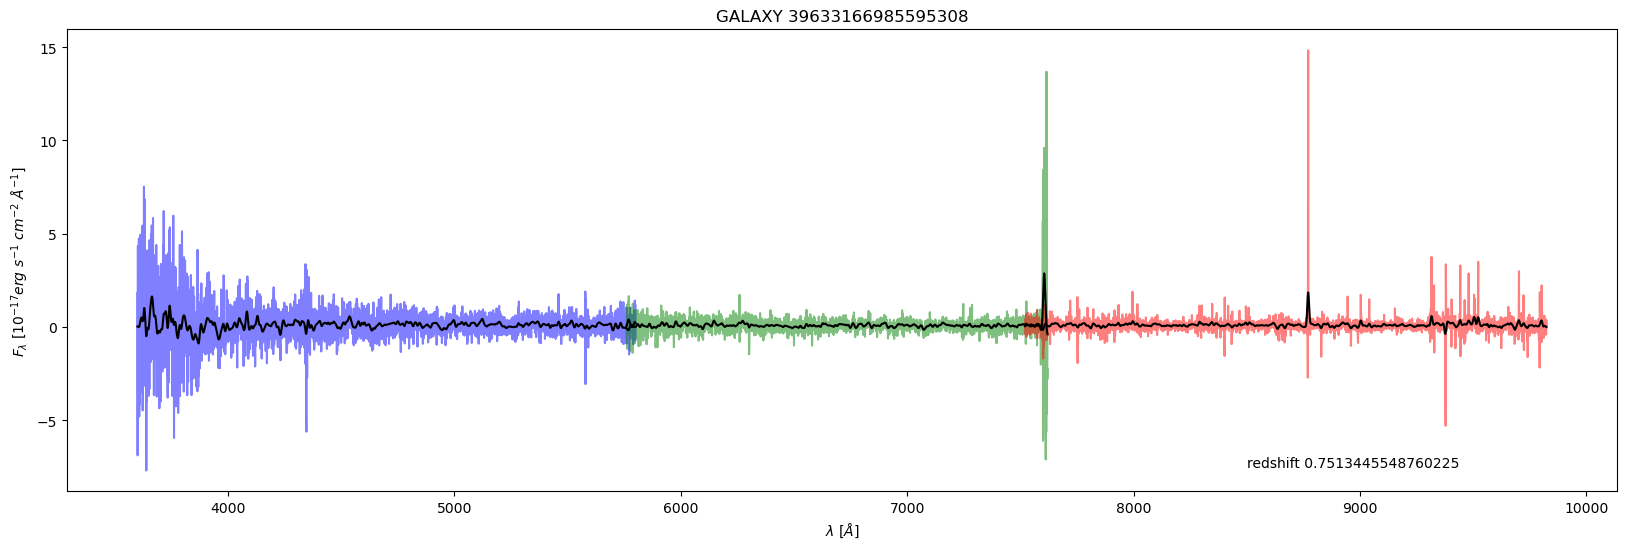

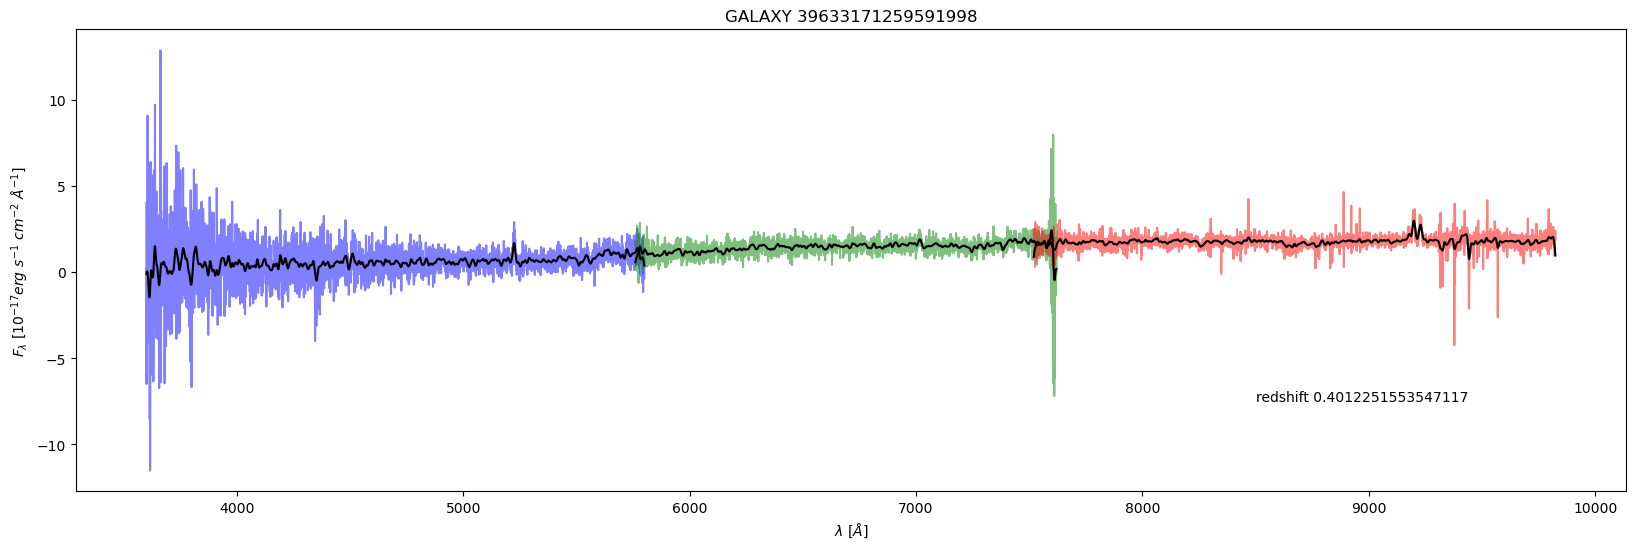

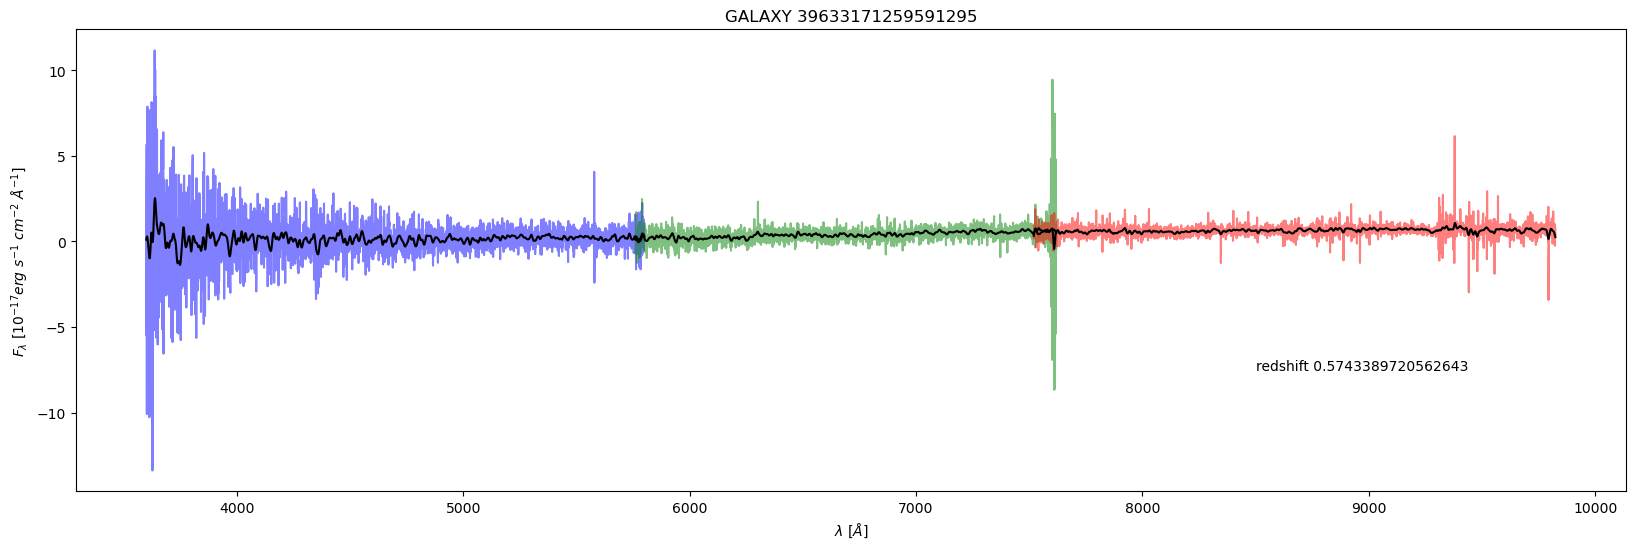

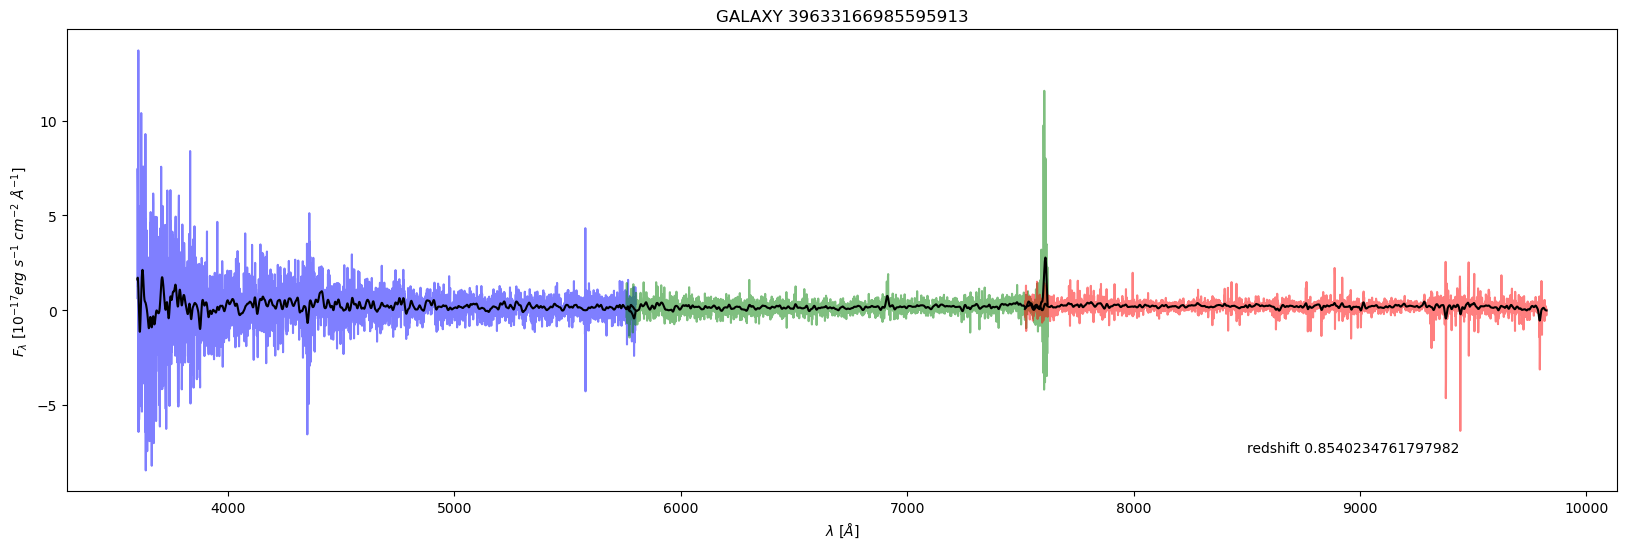

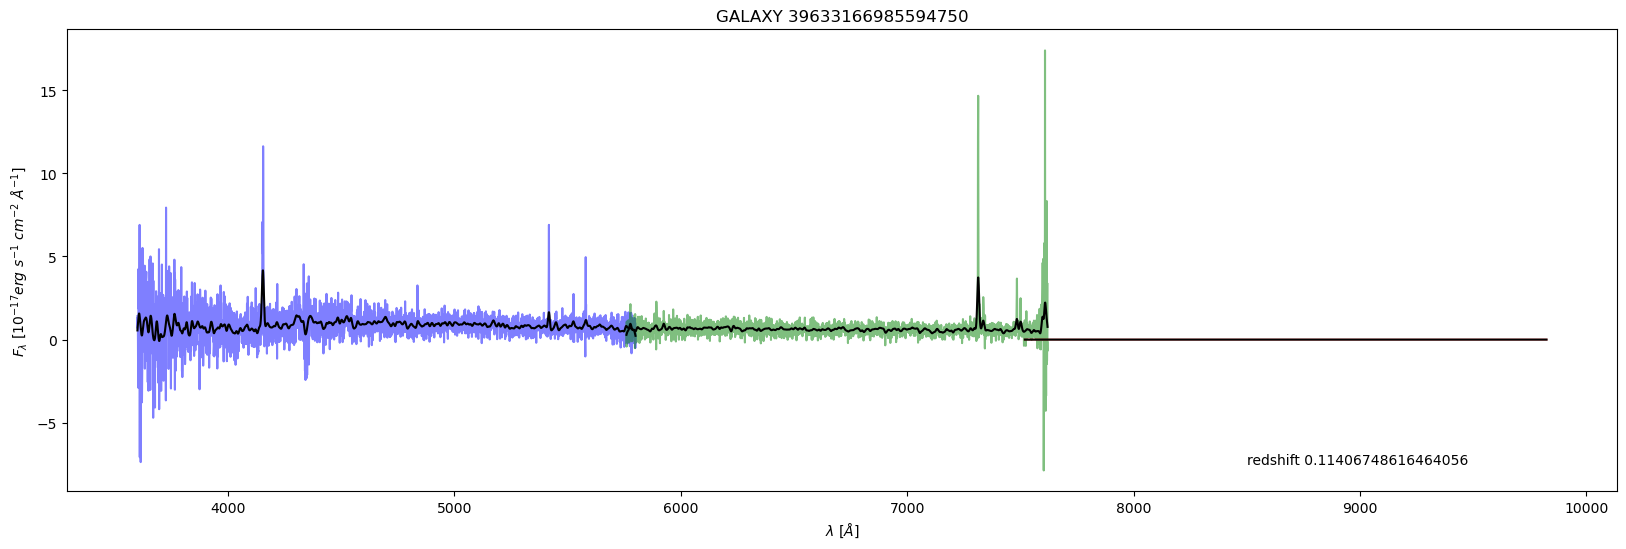

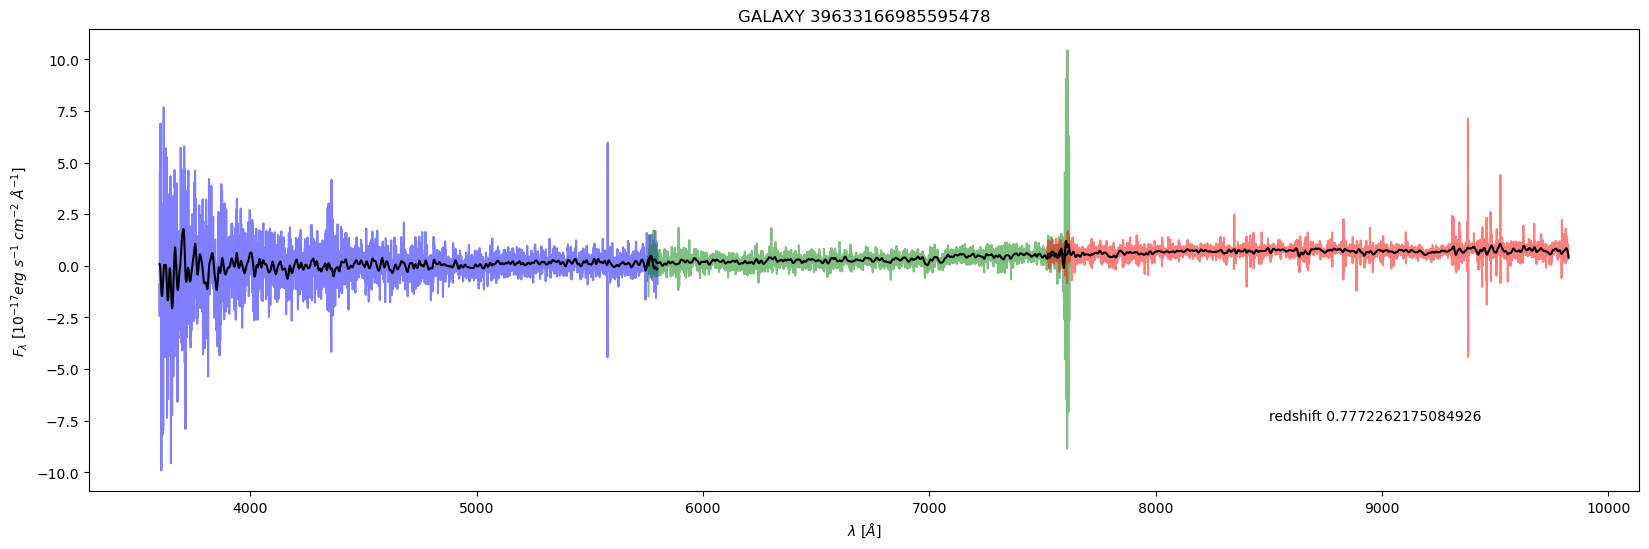

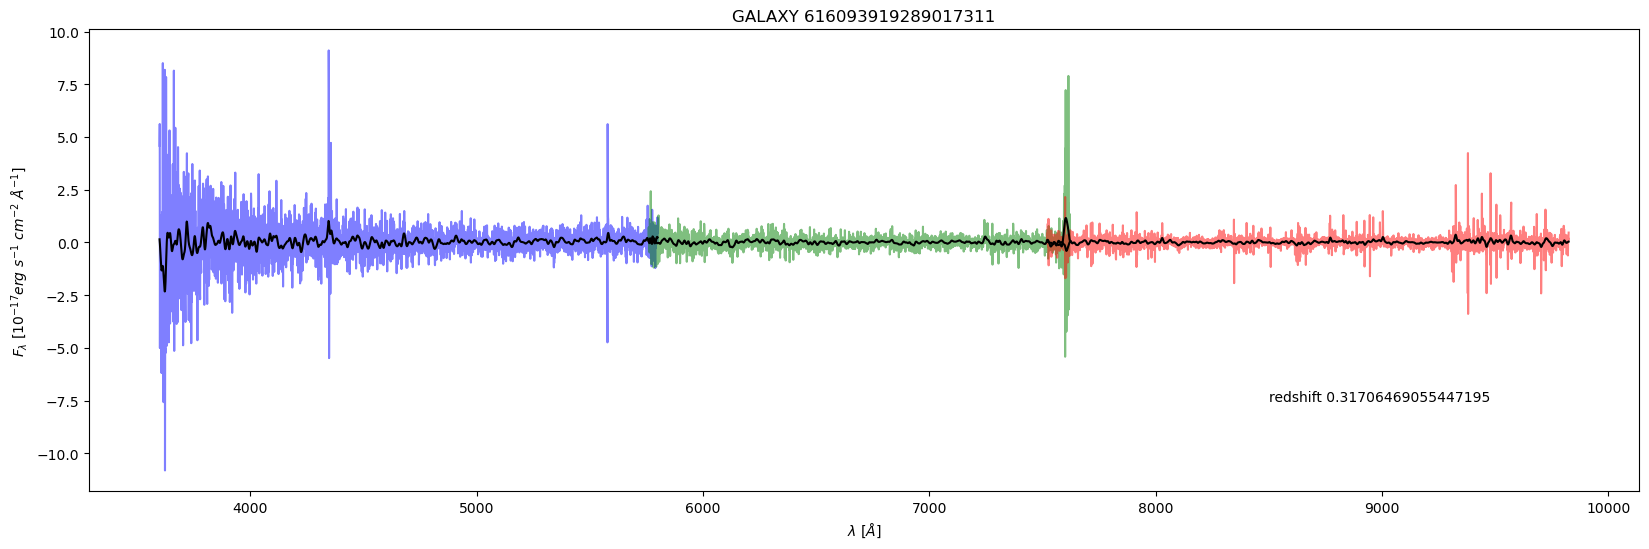

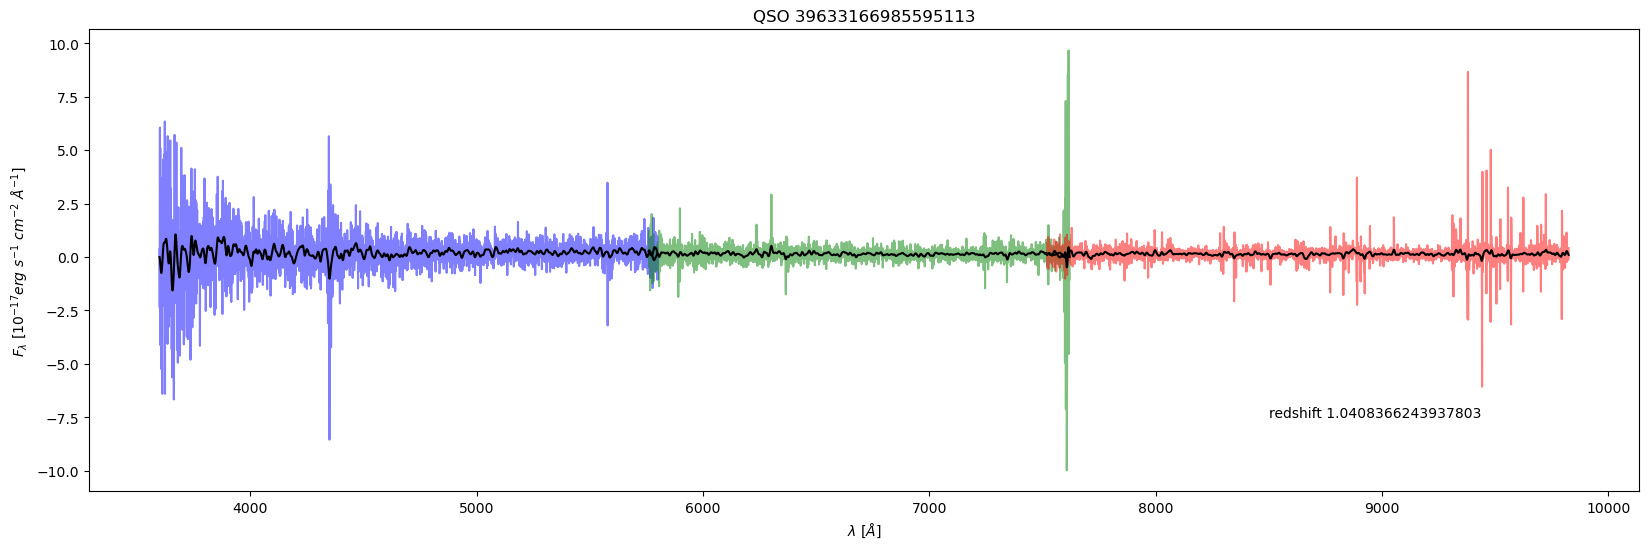

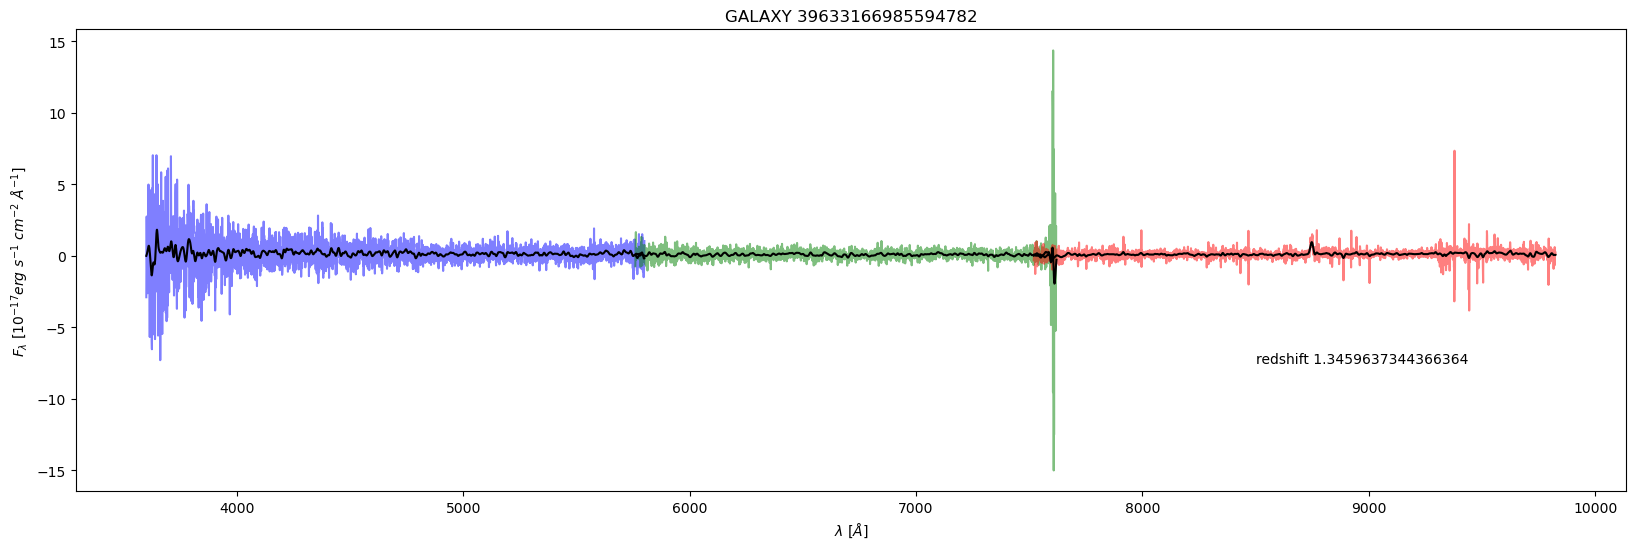

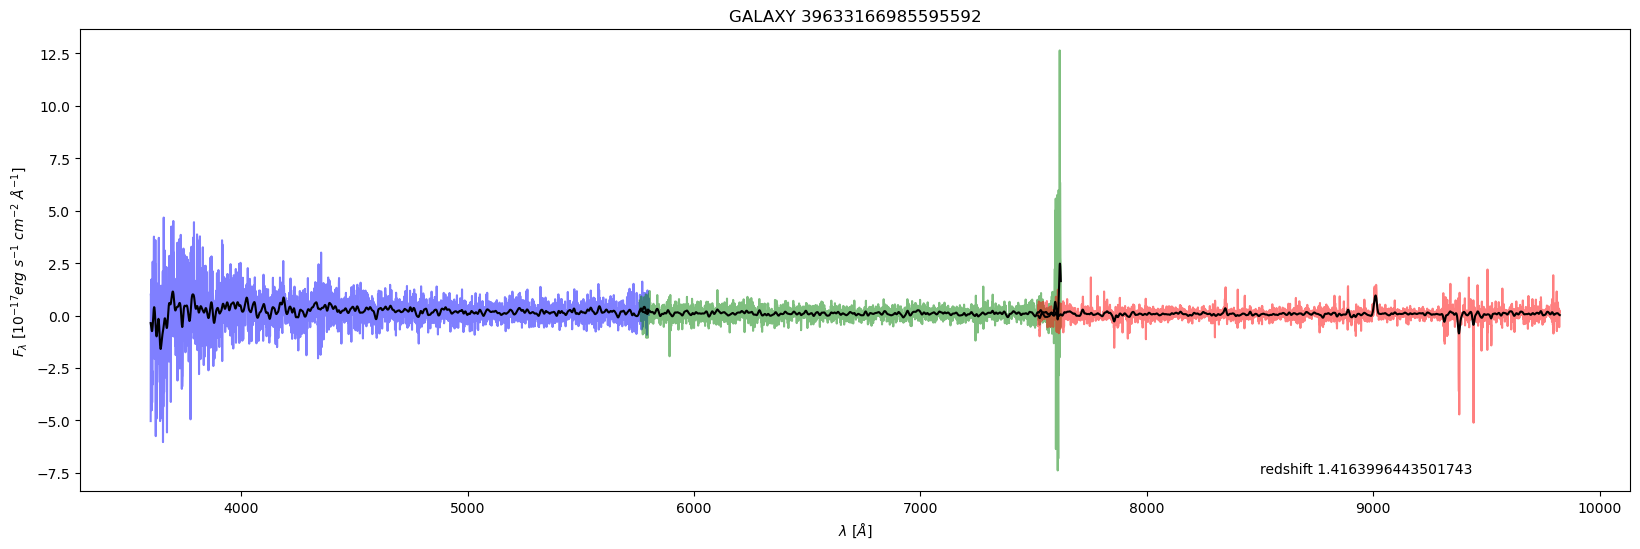

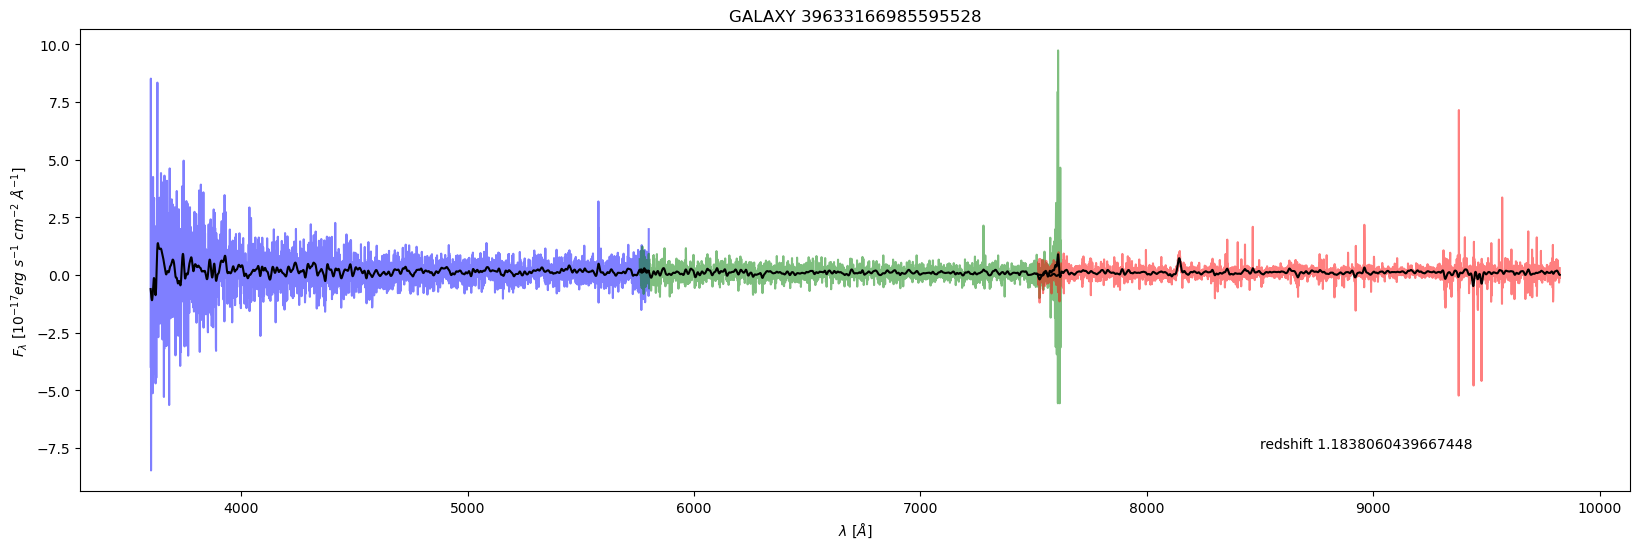

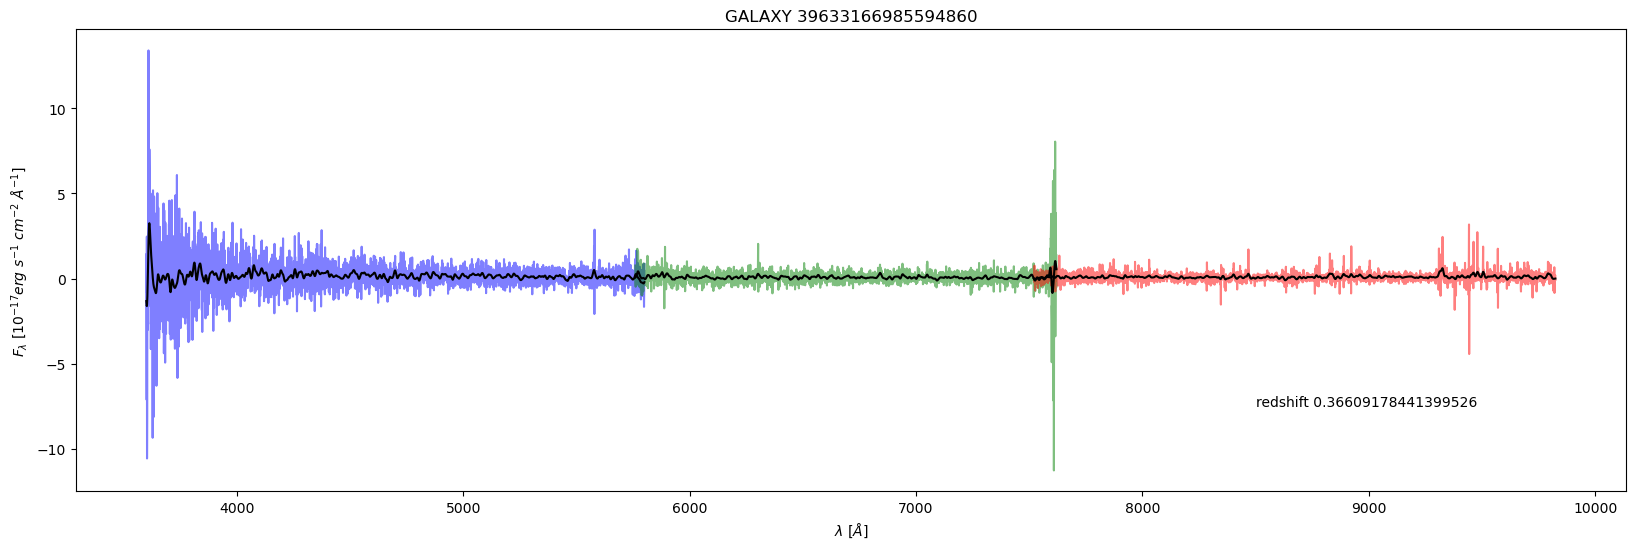

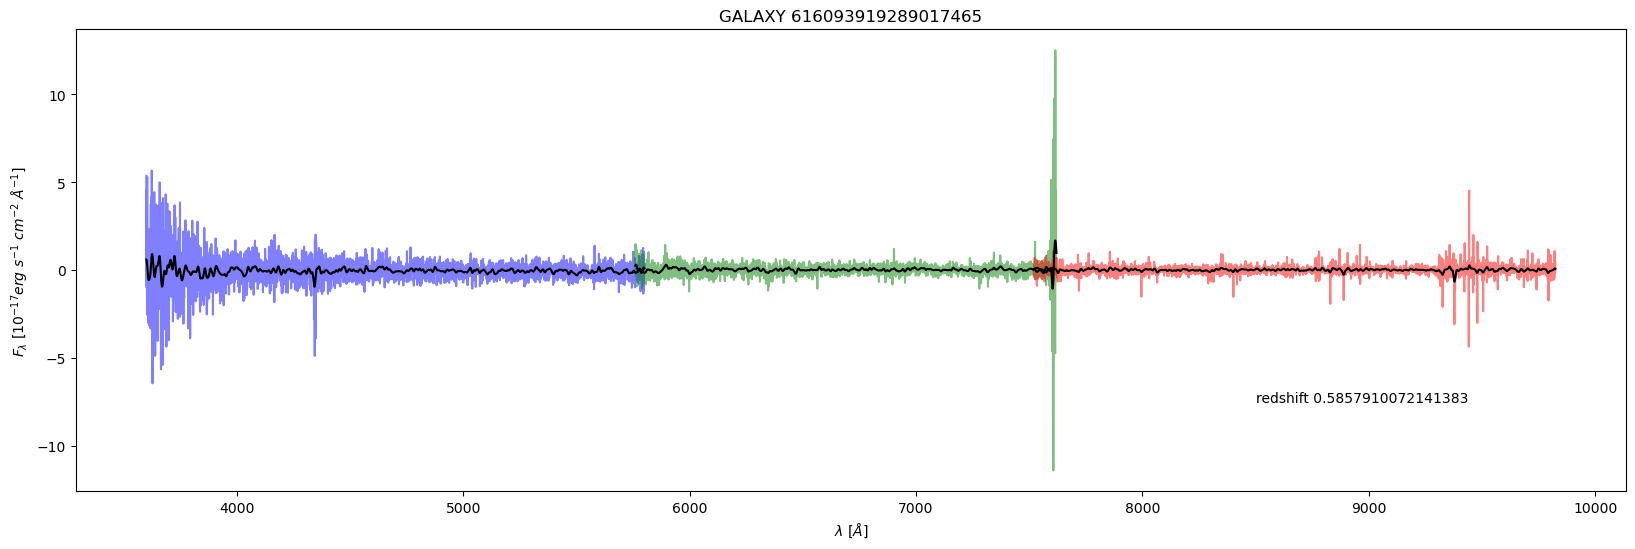

In [6]:
if check is True: 
    i=0
    while i < n_esp:
        xb=espc[4].data[i] #B_Flux espectro 0
        yb=espc[3].data #B_wavelenght
        xr=espc[9].data[i] #R_flux espectro 0
        yr=espc[8].data  #R_wavelenght
        xz=espc[14].data[i] #Z_Flux espectro 0
        yz=espc[13].data #Z_wavelenght


        targ=str(Targetid_coadd['TARGETID'][i])
        clas=Targetid_redrock['SPECTYPE'][i]
        red=str(Targetid_redrock['Z'][i])
        plt.figure(figsize = (20, 6))
        # Plot the spectrum from each arm (B,R,Z) in blue, green, red

        plt.plot(yb, xb, color = 'b', alpha = 0.5)
        plt.plot(yr, xr, color = 'g', alpha = 0.5)
        plt.plot(yz, xz, color = 'r', alpha = 0.5)
        # Over-plotting smoothed spectra in black for all the three arms
        plt.plot(yb, convolve(xb, Gaussian1DKernel(5)), color = 'k')
        plt.plot(yr, convolve(xr, Gaussian1DKernel(5)), color = 'k')
        plt.plot(yz, convolve(xz, Gaussian1DKernel(5)), color = 'k')
        plt.xlabel('$\lambda$ [$\AA$]')
        plt.ylabel('$F_{\lambda}$ [$10^{-17} erg\ s^{-1}\ cm^{-2}\ \AA^{-1}$]')
        plt.text(8500, -7.5,'redshift '+ red, fontsize= 10)
        plt.title(clas + " " + targ)
        plt.show()
        i+=1
else: 
    print ("Error en la clasificación de objetos")
